In [1]:
#opening training file in read mode
f= open('./dataset/sat.trn','r')

In [2]:
import numpy as np

In [3]:
#extracting data
x_train=np.genfromtxt(f,dtype=int)

In [4]:
print(x_train)

[[ 92 115 120 ... 113  87   3]
 [ 84 102 106 ... 104  79   3]
 [ 84 102 102 ... 104  79   3]
 ...
 [ 68  75 108 ... 104  85   4]
 [ 71  87 108 ... 104  85   4]
 [ 71  91 100 ... 100  81   4]]


In [5]:
x_train.shape

(4435, 37)

In [6]:
#extracting class labels
y_train=np.take(x_train,indices=36,axis=1)

In [7]:
#removing class labels
x_train = np.delete(x_train, -1, axis=1)

In [8]:
print(x_train)

[[ 92 115 120 ... 107 113  87]
 [ 84 102 106 ...  99 104  79]
 [ 84 102 102 ...  99 104  79]
 ...
 [ 68  75 108 ... 100 104  85]
 [ 71  87 108 ...  91 104  85]
 [ 71  91 100 ...  91 100  81]]


In [9]:
#closing train file
f.close()

#opening test file in read mode
f= open('./dataset/sat.tst','r')

In [10]:
#extract data
x_test=np.genfromtxt(f,dtype=int)

In [11]:
print(x_test)

[[ 80 102 102 ... 113  87   3]
 [ 76 102 102 ... 104  83   3]
 [ 80  98 106 ...  96  75   4]
 ...
 [ 56  68  91 ...  92  74   5]
 [ 56  68  87 ...  92  70   5]
 [ 60  71  91 ... 108  92   5]]


In [12]:
x_test.shape

(2000, 37)

In [13]:
#extract class labels for test samples
y_test=np.take(x_test,indices=36,axis=1)

In [14]:
#removing class labels
x_test = np.delete(x_test, -1, axis=1)

In [15]:
print(x_test)

[[ 80 102 102 ... 107 113  87]
 [ 76 102 102 ... 103 104  83]
 [ 80  98 106 ...  95  96  75]
 ...
 [ 56  68  91 ...  83  92  74]
 [ 56  68  87 ...  83  92  70]
 [ 60  71  91 ...  79 108  92]]


In [16]:
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt
import seaborn as sns

In [17]:
#initialize TSNE from sklearn
tsne = TSNE()

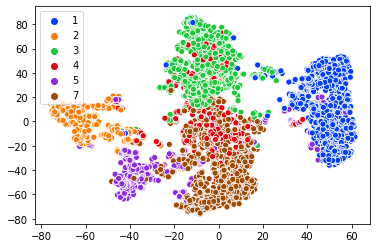

In [18]:
#Plot tsne for training data
X_embedded = tsne.fit_transform(x_train)

palette = sns.color_palette("bright", 6)

sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y_train, legend='full', palette=palette)

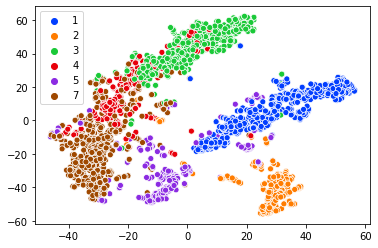

In [19]:
#Plot tsne for test data
X_embedded = tsne.fit_transform(x_test)

palette = sns.color_palette("bright", 6)

sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y_test, legend='full', palette=palette)

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

{'n_neighbors': 12}
0.853664036076663


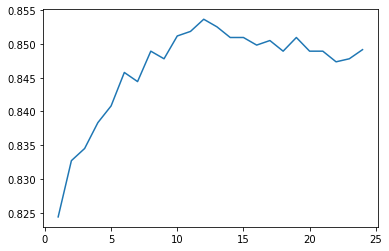

In [21]:
#create new a knn model
knn2 = KNeighborsClassifier()

#create a dictionary of all values we want to test for n_neighbors
param_grid = {'n_neighbors': np.arange(1, 25)}

#use gridsearch to test all values for n_neighbors
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)

#fit model to data
knn_gscv.fit(x_train, y_train)

#check top performing n_neighbors value
print(knn_gscv.best_params_)
print(knn_gscv.best_score_)

#plotting the mean test score for each k value
plt.plot(knn_gscv.cv_results_['param_n_neighbors'].data, knn_gscv.cv_results_['mean_test_score'])

In [22]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_absolute_error 
from math import sqrt
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [23]:
errors = [] #to store error values for different k
for K in range(25):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)
    
     #fit the model
    model.fit(x_train, y_train) 
    
     #make prediction on test set
    pred=model.predict(x_test)
    
     #calculate error for each k
    error = (mean_absolute_error(y_test,pred))
    
    #store error values
    errors.append(error) 
    print('Error value for k= ' , K , 'is:', error)

Error value for k=  1 is: 0.2435
Error value for k=  2 is: 0.271
Error value for k=  3 is: 0.235
Error value for k=  4 is: 0.245
Error value for k=  5 is: 0.236
Error value for k=  6 is: 0.255
Error value for k=  7 is: 0.2515
Error value for k=  8 is: 0.271
Error value for k=  9 is: 0.265
Error value for k=  10 is: 0.2675
Error value for k=  11 is: 0.263
Error value for k=  12 is: 0.2595
Error value for k=  13 is: 0.2645
Error value for k=  14 is: 0.2595
Error value for k=  15 is: 0.258
Error value for k=  16 is: 0.2655
Error value for k=  17 is: 0.2655
Error value for k=  18 is: 0.2655
Error value for k=  19 is: 0.267
Error value for k=  20 is: 0.272
Error value for k=  21 is: 0.2835
Error value for k=  22 is: 0.274
Error value for k=  23 is: 0.275
Error value for k=  24 is: 0.2795
Error value for k=  25 is: 0.277


In [24]:
knn = KNeighborsClassifier(n_neighbors=5)

# fitting the model
knn.fit(x_train, y_train)

# predict the response
pred = knn.predict(x_test)

# evaluate accuracy
print('\nThe accuracy of the classifier is {}%'.format(accuracy_score(y_test, pred)*100))


The accuracy of the classifier is 90.45%


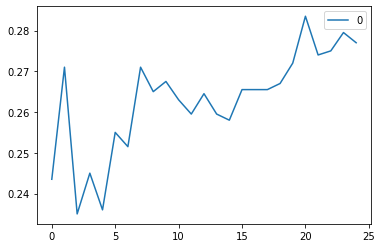

In [25]:
#plotting the error values against k values
curve = pd.DataFrame(errors) 
curve.plot()

In [26]:
from collections import Counter
from sklearn.metrics import accuracy_score

#In the case of KNN, which is a lazy algorithm, the training block reduces 
#to just memorizing the training data. 
def train(x_train, y_train):
    # do nothing 
    return

def predict(x_train, y_train, x_test, k):
    # create list for distances and targets
    distances = []
    targets = []

    for i in range(len(x_train)):
        # first we compute the euclidean distance
        distance = np.sqrt(np.sum(np.square(x_test - x_train[i, :])))
        # add it to list of distances
        distances.append([distance, i])

    # sort the list
    distances = sorted(distances)
    

    # make a list of the k neighbors' targets
    for i in range(k):
        index = distances[i][1]
        targets.append(y_train[index])

    # return most common target
    return Counter(targets).most_common(1)[0][0]

def kNearestNeighbor(x_train, y_train, x_test, k):
    # train on the input data
    train(x_train, y_train)
    
    predictions = []

    # loop over all observations
    for i in range(len(x_test)):
        predictions.append(predict(x_train, y_train, x_test[i, :], k))
        
    return np.asarray(predictions)

predictions = kNearestNeighbor(x_train, y_train, x_test, 5)

accuracy = accuracy_score(y_test, predictions)
print('\nThe accuracy of our classifier is {}%'.format(accuracy*100))


The accuracy of our classifier is 90.45%
